In [1]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [3]:
url = 'https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv'
df = pd.read_csv(url)
df.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

In [4]:
df['is_med_or_high_risk'] = (df['decile_score']>=5).astype(int)

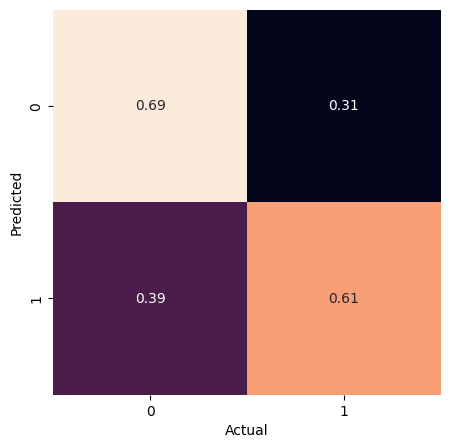

In [6]:
cm = pd.crosstab(df['is_med_or_high_risk'], df['two_year_recid'], rownames=['Predicted'], colnames=['Actual'], normalize='index')
p = plt.figure(figsize=(5,5));
p = sns.heatmap(cm, annot=True, fmt=".2f", cbar=False)

In [8]:
[[tn , fp],[fn , tp]]= confusion_matrix(df['two_year_recid'], df['is_med_or_high_risk'])
print("True negatives:", tn)
print("False positives: ", fp)
print("False negatives: ", fn)
print("True positives:", tp)

True negatives: 2681
False positives:  1282
False negatives:  1216
True positives: 2035


In [9]:
df = df[df.race.isin(["African-American","Caucasian"])]
(df['two_year_recid']==df['is_med_or_high_risk']).astype(int).groupby(df['race']).mean()

race
African-American    0.638258
Caucasian           0.669927
dtype: float64

In [11]:
!pip install fairlens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.5/91.5 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyemd: filename=pyemd-0.5.1-cp310-cp310-linux_x86_64.whl size=529171 sha256=9bf193bf243bfb4897af72c24739d39162d5a147a23d9be94f9d4faff60a0646
  Stored in directory: /root/.cache/pip/wheels/79/16/43/a541588b3c72f292471ecc780d2bf1a1f3c7a33141f4e2b1e8
Successfully built pyemd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20281 entries, 0 to 20280
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PersonID                 20281 non-null  int64  
 1   AssessmentID             20281 non-null  int64  
 2   CaseID                   20281 non-null  int64  
 3   Agency                   20281 non-null  object 
 4   LastName                 20281 non-null  object 
 5   FirstName                20281 non-null  object 
 6   MiddleName               5216 non-null   object 
 7   Sex                      20281 non-null  object 
 8   Ethnicity                20281 non-null  object 
 9   DateOfBirth              20281 non-null  object 
 10  ScaleSet                 20281 non-null  object 
 11  AssessmentReason         20281 non-null  object 
 12  Language                 20281 non-null  object 
 13  LegalStatus              20281 non-null  object 
 14  CustodyStatus         

(None,
    PersonID  AssessmentID  CaseID    Agency  LastName  FirstName MiddleName  \
 0     50844         57167   51950  PRETRIAL    Fisher      Kevin        NaN   
 1     50848         57174   51956  PRETRIAL   KENDALL      KEVIN        NaN   
 2     50855         57181   51963  PRETRIAL     DAYES     DANIEL        NaN   
 3     50850         57176   51958  PRETRIAL      Debe   Mikerlie     George   
 4     50839         57162   51945  PRETRIAL  McLaurin  Stephanie     Nicole   
 
       Sex         Ethnicity DateOfBirth  ... Language LegalStatus  \
 0    Male         Caucasian  1992-12-05  ...  English    Pretrial   
 1    Male         Caucasian  1984-09-16  ...  English    Pretrial   
 2    Male  African-American  1994-08-25  ...  English    Pretrial   
 3  Female  African-American  1994-10-09  ...  English    Pretrial   
 4  Female  African-American  1985-06-29  ...  English    Pretrial   
 
   CustodyStatus      MaritalStatus ScreeningDate RecSupervisionLevelText  \
 0   Jail In

['DateOfBirth', 'Ethnicity', 'Language', 'MaritalStatus', 'Sex']
Sensitive Attributes: ['Ethnicity', 'MaritalStatus', 'Sex']

                         Group Distance  Proportion  Counts   P-Value
African-American, Single, Male    0.249    0.291011    5902 3.62e-251
      African-American, Single    0.202    0.369163    7487 1.30e-196
                       Married    0.301    0.134313    2724 7.37e-193
        African-American, Male    0.201    0.353138    7162 4.03e-188
                 Married, Male    0.281    0.108229    2195 9.69e-139
              African-American    0.156    0.444899    9023 3.25e-133
                      Divorced    0.321    0.063754    1293 7.51e-112
            Caucasian, Married    0.351    0.049504    1004 7.73e-106
                  Single, Male    0.121    0.582910   11822  3.30e-95
           Caucasian, Divorced    0.341    0.037473     760  1.28e-76
      Caucasian, Married, Male    0.338    0.036389     738  4.46e-73
               Married, Female    

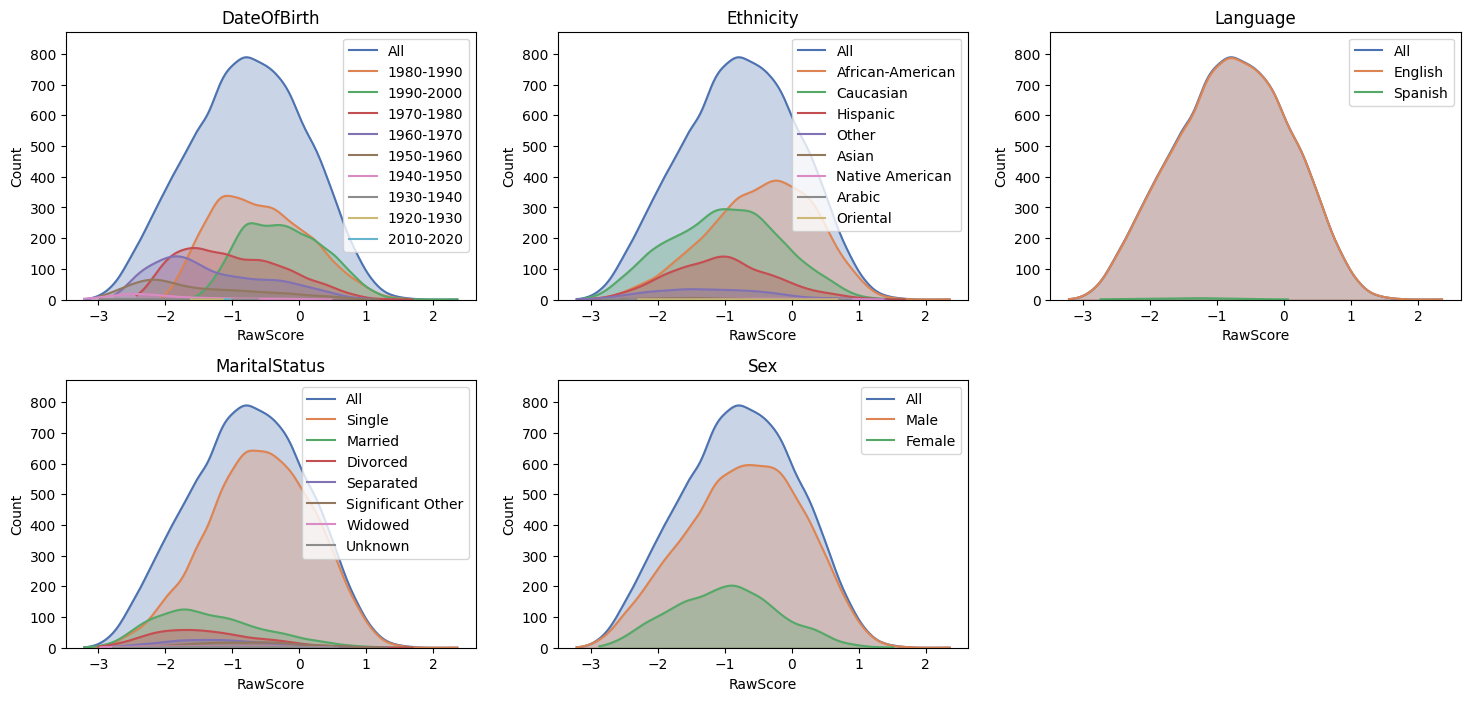

In [45]:
import pandas as pd
import fairlens as fl

df = pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/Platform-and-Model-Design-for-Responsible-AI/main/Chapter07/data/compas.csv")
df.info(), df.head()
fscorer = fl.FairnessScorer(df, "RawScore")
print(fscorer.sensitive_attrs)
fscorer.plot_distributions()

fscorer = fl.FairnessScorer(df, "RawScore", ["Ethnicity", "Sex", "MaritalStatus"])
fscorer.demographic_report(max_rows=20)

# We also plot the distributions of decile scores in subgroups made of African-Americans and Caucasians as shown here:

In [15]:
#Scoring API
sensitive_attrs = ["Ethnicity", "Sex"]
target_attr = "RawScore"
fscorer = fl.FairnessScorer(df, target_attr, sensitive_attrs)
df_dist = fscorer.distribution_score()
print("Scores", df_dist)

Scores                        Group  Distance  Proportion  Counts
0                  Caucasian  0.106594    0.358020    7261
1           African-American  0.156011    0.444899    9023
2                   Hispanic  0.163547    0.143681    2914
3                      Other  0.220045    0.042601     864
4                      Asian  0.320241    0.005325     108
5            Native American  0.186467    0.003599      73
6                   Oriental  0.306338    0.000641      13
7                     Arabic  0.163487    0.001233      25
8                       Male  0.035569    0.780928   15838
9                     Female  0.126795    0.219072    4443
10           Caucasian, Male  0.087198    0.268724    5450
11    African-American, Male  0.201106    0.353138    7162
12  African-American, Female  0.050609    0.091761    1861
13            Hispanic, Male  0.136174    0.115231    2337
14         Caucasian, Female  0.175940    0.089295    1811
15               Other, Male  0.196701    0.03515

<Axes: xlabel='RawScore', ylabel='Count'>

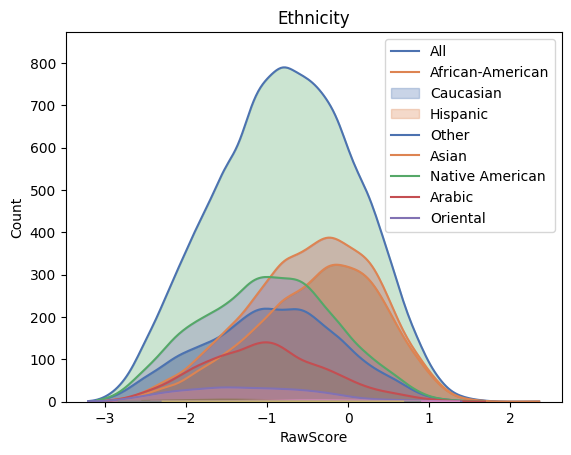

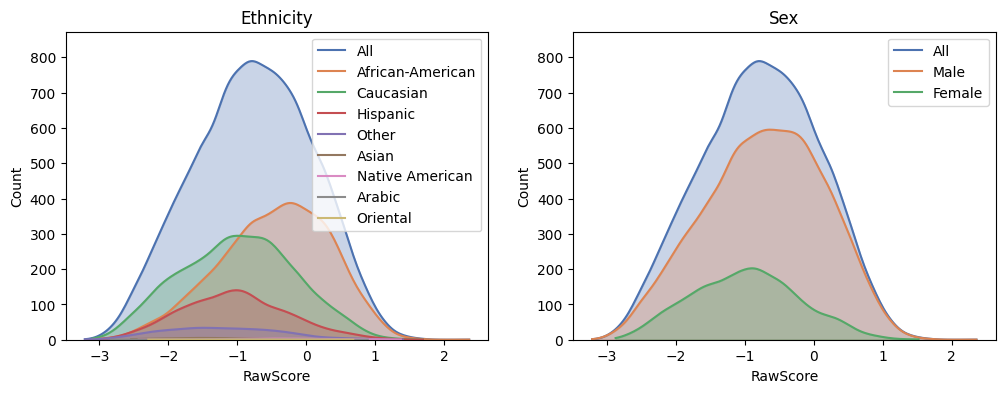

In [17]:
#@title Distribution of Groups
#vis_distb.py

target_attr = "RawScore"
group1 = {"Sex": ["Male"], "Ethnicity": ["Caucasian"]}
group2 = {"Sex": ["Male"], "Ethnicity": ["African-American"]}

fl.plot.distr_plot(df, target_attr, [group1, group2])

#Distribution of Groups in a Column
target_attr = "RawScore"

sensitive_attr = "Ethnicity"

fl.plot.attr_distr_plot(df, target_attr, sensitive_attr)
target_attr = "RawScore"

sensitive_attrs = ["Ethnicity", "Sex"]

fl.plot.mult_distr_plot(df, target_attr, sensitive_attrs)

<Axes: xlabel='DecileScore', ylabel='Count'>

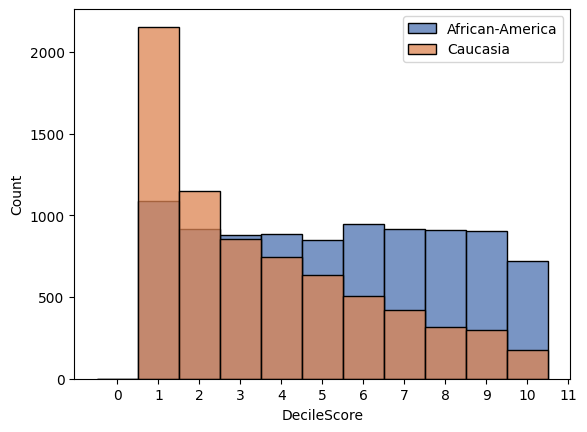

In [21]:
group1 = {"Ethnicity": ["African-American"]}
group2 = {"Ethnicity": ["Caucasian"]}
fl.plot.distr_plot(df,"DecileScore", [group1, group2])
plt.legend(["African-America","Caucasia"])
plt.show()

In [23]:
#@title statistical distance
"""
Statistical distance
This is another important distance parameter that we want to consider if we 
want to evaluate how the distributions between two sensitive demographic groups/sub-groups vary.
 The metric is used for evaluating the statistical distance between two probability distributions,
  group1 and group2, with respect to the target attribute.


"""

group1 = {"Ethnicity": ["African-American"]}
group2 = df["Ethnicity"] == "Caucasian"
print(fl.metrics.stat_distance(df, target_attr, group1, group2, mode="auto"))
print(fl.metrics.stat_distance(df, target_attr, group1, group2, mode="auto", p_value=True))
_, bin_edges = np.histogram(df[target_attr], bins="auto")
print(fl.metrics.stat_distance(df, target_attr, group1, group2, mode="emd", bin_edges=bin_edges))

'\nStatistical distance\nThis is another important distance parameter that we want to consider if we \nwant to evaluate how the distributions between two sensitive demographic groups/sub-groups vary.\n The metric is used for evaluating the statistical distance between two probability distributions,\n  group1 and group2, with respect to the target attribute.\n\n\n'

(0.26075238442125354,)
(0.26075238442125354, 6.76556519475455e-241)
(0.5266093392666343,)


In [24]:
df_deep = df.rename(columns={"Ethnicity": "A", "Language": "Random", "MaritalStatus": "B", "Sex": "C"})
# Apply deep detection algorithm.
print("Deep detection algorithm", fl.sensitive.detect_names_df(df, deep_search=True))

Deep detection algorithm {'Sex': 'Gender', 'Ethnicity': 'Ethnicity', 'DateOfBirth': 'Age', 'Language': 'Nationality', 'MaritalStatus': 'Family Status'}


# Linear regression
Linear regression can help us to identify proxy features, by evaluating the correlation between the dependent and independent variables.

Cosine similarity/distance method
Cosine similarity is one of the mechanisms used to detect proxy features, where the similarity factor evaluates similar items in multidimensional space. Any two features in a dataset (say, for example, for a loan application dataset) would become proxy features when the cosine similarity between any two vectors falls in the same direction. Such cases seem obvious when we see monthly income and expenditure behaving as proxy features, particularly in a loan application with the applicant’s gender and number of dependents taken together.

In [25]:
url1 ="https://raw.githubusercontent.com/PacktPublishing/Platform-and-Model-Design-for-Responsible-AI/main/Chapter07/data/german_credit_data.csv"

In [41]:
df1 = pd.read_csv(url1)
data = df1[['Age', 'Sex', 'Job', 'Duration', 'Credit amount']]
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

covar_sex_dur = data.Sex.cov(data.Duration)
variance_sex = data.Sex.var()
variance_dur= data.Duration.var()
association =covar_sex_dur/(variance_sex*variance_dur)
print("Association between Sex and Duration", association)

Association between Sex and Duration -0.014593816319825929


<ipython-input-41-05ba3906bb01>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})


# MUTUAL SCORE

In [42]:
from sklearn.metrics import mutual_info_score
mi_1 = mutual_info_score(data['Age'], data['Sex'])
mi_2 = mutual_info_score(data['Job'], data['Sex'])
mi_3 = mutual_info_score(data['Duration'], data['Sex'])
mi_4 = mutual_info_score(data['Credit amount'], data['Sex'])

print("Mutual Info", mi_1, mi_2, mi_3, mi_4)

Mutual Info 0.06543499129250782 0.003960052834578523 0.01904103843232129 0.5717832060773372


# Significance tests
When we assess fairness scores and evaluate statistical distances, we may also want to test the null hypothesis and see whether the null or alternate hypothesis is true. This can be done using bootstrapping or permutation tests to resample the data multiple times. These iterations compute the statistic multiple times and provide an estimate of its distribution, by computing the p-value or the confidence interval for the metric:

In [47]:
group1 = df[df["Sex"] == "Male"]["RawScore"]
group2 = df[df["Sex"] == "Female"]["RawScore"]

#Resampling
test_statistic = lambda x, y: x.mean() - y.mean()
t_distribution = fl.metrics.permutation_statistic(group1, group2, test_statistic, n_perm=100)
print("Tdistb", t_distribution)
t_distribution = fl.metrics.bootstrap_statistic(group1, group2, test_statistic, n_samples=100)
print(t_distribution)

#Intervals and P-Values
t_observed = test_statistic(group1, group2)
print("Resampling Interval", fl.metrics.resampling_interval(t_observed, t_distribution, cl=0.95))
print("Resampling Pval", fl.metrics.resampling_p_value(t_observed, t_distribution, alternative="two-sided"))

Tdistb [-0.00535817  0.00466874 -0.00777916 -0.00172381  0.00283571 -0.02565986
  0.00289623 -0.00364907  0.0031758   0.01166942 -0.00866109  0.01207868
  0.00126207  0.02225834 -0.00301789  0.01119098 -0.00775034 -0.01220898
  0.01459766  0.02381469 -0.00251352  0.00010057  0.00618762 -0.00613635
 -0.02206873  0.00812729 -0.02363084  0.01744519  0.00600604  0.01293467
  0.0125427   0.00745863  0.02648354  0.01692353 -0.00646779 -0.00012135
 -0.01611138 -0.03370098 -0.00486245  0.01163483 -0.00272391  0.02103344
  0.01455154  0.00262243 -0.00610176  0.00108337 -0.01806546  0.01290297
 -0.00138084 -0.00579049  0.00436323 -0.00056808  0.01200951 -0.00411598
 -0.00165176 -0.00853139 -0.02036251  0.01329205  0.00674675 -0.00700387
  0.00093062 -0.0176562  -0.02237135 -0.01386044  0.01752301 -0.01389503
  0.02244856  0.00273195 -0.01504788 -0.00035769 -0.00283343 -0.00397187
 -0.00869856  0.00866048  0.00105744 -0.00071219 -0.00531206  0.00461974
  0.00656229 -0.00064014  0.01466106  0.0135